#**Data Mining and Machine Learning - Assignment questions 4 to 10**


**Due: Sunday November 13rd, 23:59**

This is the following part of your graded assignement. You will receive only one grade at the end. 

To complete the assignment you have to do both:

1.   Complete the exercises and submit your Python notebook
2.   Answer the questions to the quiz on Moodle 

> Note: You can only complete the quiz *one time*. Have your notebook ready with your solutions for answering the quiz.

The answers to the quiz should be supported by your code in the notebook. If they are not you will not receive points for them.


**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.


You can post your questions in [slack channel](https://join.slack.com/t/dataminingand-dy12624/shared_invite/zt-1fah1gpfa-qAzj~JaF_0igZ_hhfMcBBw) #assignment_questions.


If there is need for further clarifications on the questions, after the assignment is released, we will update this file on GitHub, so make sure you check the git repo for updates.


To get started, run the first few cells to load the dataset and then check out the questions.


Good luck!

In [1]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



**Important!** : For all the questions below, fix the seed of random generators to 50.


In [2]:
np.random.seed = 50

# **Classification**

For the first part we use the airline passenger satisfaction data of several customers. The dataset contains information (categorical and numerical) on these individuals such as:

*   Gender: Male or Female  
*   customer_type: How loyal is a customer
*   age: the age of the customer 
*   type_of_travel: the purpose of the travel 
*   customer_class: the class of the seat 
*   flight_distance: the distance in km
*   inflight_wifi_service: the level of wifi service satisfaction 
*   departure_arrival_time_convenient: satisfaction level
*   ease_of_online_booking: satisfaction level  
*   gate_location: satisfaction level  
*   food_and_drink: satisfaction level 
*   online_boarding: satisfaction level 
*   seat_confort: satisfaction level 
*   inflight_entertainment: satisfaction level 
*   onboard_service: satisfaction level 
*   leg_room_service: satisfaction level
*   baggage handling: satisfaction level 
*   checkin_service: satisfaction level 
*   inflight_service: satisfaction level 
*   cleanliness: satisfaction level
*   departure_delay_in_minutes: number of minutes the flight departure has been delayed 
*   arrival_delay_in_minutes: number of minutes the flight arrival has been delayed
*   satisfaction: response variable 

<br> 
**The task is to build several models which predict whether a customer is "satisfied" or "neutral or dissatisfied" by the flight given a new individual and its feature values. Then you will have to compare these models between them.**



## 4. Load the data 

In [3]:
# Load data
#df = pd.read_csv('airline_passenger_satisfaction.csv', index_col='Unnamed: 0')
df = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/Assignment/Assignment_Q4_to_Q10_2022/airline_passenger_satisfaction.csv', index_col='Unnamed: 0')

### 4.1. How many rows and columns does the dataset have?

In [4]:
df.shape

(129883, 23)

### 4.2. Is there any NAs value in the dataset ? (YES/NO) 

> If there is any missing values in this dataset, you should filled them by using the mean of the others values from that column. 





In [5]:
df.isna().any()

Gender                               False
customer_type                        False
age                                  False
type_of_travel                       False
customer_class                       False
flight_distance                      False
inflight_wifi_service                False
departure_arrival_time_convenient    False
ease_of_online_booking               False
gate_location                        False
food_and_drink                       False
online_boarding                      False
seat_comfort                         False
inflight_entertainment               False
onboard_service                      False
leg_room_service                     False
baggage_handling                     False
checkin_service                      False
inflight_service                     False
cleanliness                          False
departure_delay_in_minutes           False
arrival_delay_in_minutes              True
satisfaction                         False
dtype: bool

### 4.3. What is the average departure delay ? 


In [6]:
df.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df.departure_delay_in_minutes.dropna().mean()

14.713372804755048


### 4.4. Looking at the `type_of_travel` column, calculate and show the frequency of each class in the total dataset.
> There are two classes : "Business travel" and "Personal Travel"



In [8]:
tmp = df.groupby('type_of_travel').count()

business_travel = tmp.Gender.iloc[0]/df.shape[0]
perso_travel = tmp.Gender.iloc[1]/df.shape[0]

print(business_travel, perso_travel)

0.6905753639814295 0.30942463601857056


## 5. Encode categorical variables

For the following categorical features:
 
*   encode `Gender` and `type_of_travel` with a label encoder 
*   encode `customer_class` with an ordinal encoder 
*   encode `customer_type` with one hot encoding
*   also encode the labels of your dependent variable (y) named `satisfaction` to have [0, 1] labels instead of ["neutral or dissatisfied" ; "satisfied" ].



### 5.1. Use a *Label Encoder* to encode `Gender`and `type_of_travel` as new columns named "le_Gender" and "le_type_of_travel" respectively.

In [9]:
data = df
le=LabelEncoder()
data['le_Gender'] = pd.Series(le.fit_transform(data.Gender))
data['le_type_of_travel'] = pd.Series(le.fit_transform(data.type_of_travel))

### 5.2. Use an *Ordinal Encoder* to encode `customer_class` as a new column named "oe_customer_class". 
> For the ordinal encoding you should set your own dictionary such that `Eco` corresponds to 0, 1 to `Eco Plus` and 2 to `Business`. 


In [10]:
oe = OrdinalEncoder()
oe.set_params(categories= [['Eco', 'Eco Plus', 'Business']])
cust_oe = oe.fit_transform(data[['customer_class']])

data['oe_customer_class'] = pd.DataFrame(cust_oe).astype('int')

data

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,le_Gender,le_type_of_travel,oe_customer_class
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,1,1,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,1,0,2
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,0,0,2
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,2
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,5,4,5,4,0,0.0,satisfied,1,0,2
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,1,1,0,0.0,neutral or dissatisfied,0,1,0
129880,Female,Loyal Customer,20,Personal Travel,Business,348,4,5,3,5,...,4,4,3,3,0,5.0,satisfied,0,1,2
129881,Male,disloyal Customer,50,Business travel,Business,800,3,4,3,4,...,3,2,5,3,0,5.0,satisfied,1,0,2


### 5.3. Une *One Hot Encoding* to encode the `customer_type` column

In [11]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data[["customer_type"]])
data[ohe.categories_[0]] = transformed.toarray()
data = data.rename(columns={'Loyal Customer': "Loyal_Customer", 'disloyal Customer' :  'disloyal_Customer'})

### 5.4. Use a *Label Encoder* to encode the dependent variable `satisfaction` as a new column named "le_satisfaction". 

In [12]:
data['le_satisfaction'] = pd.Series(le.fit_transform(data.satisfaction))

### 5.5. Concatenate all the newly encoded features to the initial dataframe and create a new data named `data`. 

> You can use the `pd.concat`function. 

The newly encoded features are:

*   "le_Gender",
*   "le_type_of_travel",
*   "oe_customer_class", 
*   the hot-encoded column `customer_type`, which should have been separated as (for example):
  *   "Loyal_Customer"
  *   "disloyal_Customer"
*   and "le_satisfaction" 

Hint: You should have a total of 29 features in the concatenated dataset.



In [13]:
data.shape

(129883, 29)

## 6. Train a Logistic Regression with Standardisation and Cross Validation

For this section, train a logistic regression model with cross-validation and the use of standardisation on the Airline Passenger Satisfaction dataset.

*   Use all of the independent variable features  available from the concatenated dataset from question 5.5. (named `data`).
*   Your dependent variable (y) is the column named "satisfaction", but we will use the encoded column "le_satisfaction".
*   Standardize only the numerical features (not the categorical features) to have mean of 0 and standad deviation of 1. 


### 6.1. Determine your dependent variable as `y` and your set of independent variables as `X`. 

> `X` should have 23 features: 
<br> "age", "flight_distance", "inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "onboard_service", "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness", "departure_delay_in_minutes", "arrival_delay_in_minutes", "le_Gender", "le_type_of_travel", "oe_customer_class",  	"Loyal_Customer" and "disloyal_Customer". 

In [14]:
features = ["age", "flight_distance", "inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "onboard_service", "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness", "departure_delay_in_minutes", "arrival_delay_in_minutes", "le_Gender", "le_type_of_travel", "oe_customer_class", "Loyal_Customer", "disloyal_Customer"]
data.dropna(inplace=True)
x=data[features]
y=data[['le_satisfaction']]

### 6.2. Train/test splitting: split the data into 80% training and 20% test set. Remember to set the random seed to 50.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

### 6.3. Standardize numerical features only. They should have a mean of 0 and a standard deviation of 1. 

The numerical features are: 

*   age
*   flight_distance
*   departure_delay_in_minutes
*   arrival_delay_in_minutes

> You can use the Scikit-learn `StandardScaler` function.

> You are now still working with the dataset named `data`. You do not nead to do the traning and testing sets splitting. You will use the one previously defined under question 6.2.

In [16]:
num_cols = ["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]
ss = StandardScaler()

pp = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

encoded_x_train = pp.fit_transform(x_train)
df_encoded_x_train = pd.DataFrame(encoded_x_train, columns=x_train.columns)

encoded_x_test = pp.transform(x_test)
df_encoded_x_test = pd.DataFrame(encoded_x_test, columns=x_test.columns)

df_encoded_x_train.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,le_Gender,le_type_of_travel,oe_customer_class,Loyal_Customer,disloyal_Customer
0,-0.622300,1.368899,-0.386119,-0.392637,4.0,2.0,2.0,2.0,4.0,4.0,...,4.0,2.0,4.0,1.0,4.0,1.0,0.0,2.0,1.0,0.0
1,-0.820925,-0.952715,-0.386119,-0.392637,2.0,4.0,2.0,2.0,5.0,2.0,...,5.0,4.0,5.0,4.0,5.0,1.0,1.0,1.0,1.0,0.0
2,-0.953343,-0.176836,-0.068295,-0.392637,3.0,3.0,3.0,2.0,2.0,3.0,...,5.0,5.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0
3,0.834291,-0.730892,-0.386119,-0.392637,1.0,0.0,0.0,4.0,3.0,4.0,...,0.0,1.0,1.0,4.0,3.0,1.0,0.0,2.0,1.0,0.0
4,1.165334,1.382951,-0.386119,-0.053225,5.0,5.0,5.0,5.0,3.0,5.0,...,4.0,4.0,5.0,4.0,3.0,0.0,0.0,2.0,1.0,0.0


### 6.4. Training: train a Logistic Regression model with cross validation on the standardized features (done on point 6.3.). I remind you that these features came from the dataset named `data` that you created on point 5.5. 
### Use the following parameters for the `LogisticRegressionCV()`: 

*   Use the solver `lbfgs`
*   Set the cross-validation to 5 folds
*   Set the maximum interation to 1000
*   Set the random state to 50


In [17]:
lr = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=50)

lr.fit(df_encoded_x_train, y_train)

c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(cv=5, max_iter=1000, random_state=50)

### 6.5. Compute the Base Rate (Default Rate) over the full size of the dataset named `data` (created on question 5.5) to determine whether the accuracy you found is good or bad. 
> Base Rate = (most frequent class) / (total observations)


In [18]:
y_train.value_counts(normalize=True)


le_satisfaction
0                  0.565507
1                  0.434493
dtype: float64

### 6.6. Accuracy: What is the test accuracy? What is the train accuracy?

In [19]:
# TEST
prediction = lr.predict(df_encoded_x_test)
accuracy_test_logistic_regression = accuracy_score(y_test, prediction)
accuracy_test_logistic_regression

0.8723839678739671

In [20]:
# TRAIN
prediction_train = lr.predict(df_encoded_x_train)
accuracy_train_logistic_regression = accuracy_score(y_train, prediction_train)
accuracy_train_logistic_regression

0.8747490153679821

### 6.7. Plot the confusion matrix for the test data. Based on the outcome, determine what how many observations are False Negative and how many are True Positive. 

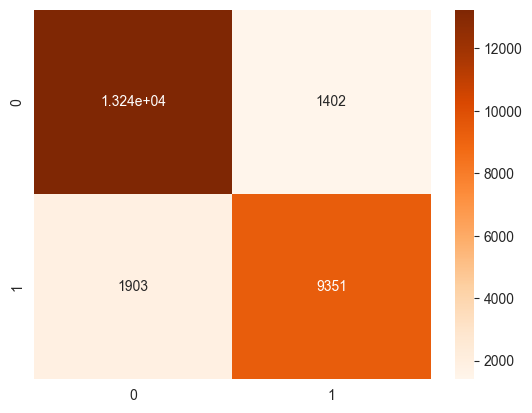

In [21]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction)), annot=True, cmap='Oranges', fmt='.4g');

In [22]:
# use the code below to identify your TP, TN, FP, FN
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#print("True positives: "+ str(tp))
#print("True negatives: "+ str(tn))
#print("False positives: "+ str(fp))
#print("False negatives: "+ str(fn))

### 6.8. Calculate the precision and recall on the test set.

In [23]:
precision_logistic_regression = precision_score(y_test, prediction)

In [24]:
recall_logistic_regression = recall_score(y_test, prediction)

recall_logistic_regression

0.8309045672649724


### 6.9. Use the logistic regression model with standardisation and cross validation to predict whether a customer with the following characteristics is satisfied or not:
 
> The customer is a man, a disloyal customer and is aged of 35 years old. His flight is for a business travel, and his company bought him a seat in Eco Plus class. The flight distance is of 2360km, he gave: 
*   3 for the inflight wifi service 
*   4 for the departure arrival time convenience 
*   2 for the ease of online booking
*   2 for the gate location 
*   5 for the food and drink
*   1 for the online boarding 
*   4 for the seat confort 
*   0 for the inflight entertainment
*   4 for the onboard service 
*   3 for the leg room service 
*   4 for the baggage handling 
*   2 for the check-in service 
*   2 for the inflight service 
*   4 for the cleanliness 

> In addition to that, there were a departure delay of 20 minutes and an arrival delay of 10 minutes. 
   



In [25]:
vals = [[35, 2360, 3,4,2,2,5,1,4,0,4,3,4,2,2,4,20,10,0, 1, 1, 0, 1]]
tmp = pd.DataFrame(vals, columns = x_train.columns)
encoded_vals = pp.transform(tmp)

pred_y = lr.predict(encoded_vals)
print(pred_y, 'not satisfied')

[0] not satisfied


c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


In [26]:
data.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,le_Gender,le_type_of_travel,oe_customer_class,Loyal_Customer,disloyal_Customer,le_satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,25,18.0,neutral or dissatisfied,1,1,1,1.0,0.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,6.0,neutral or dissatisfied,1,0,2,0.0,1.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,0,0.0,satisfied,0,0,2,1.0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,11,9.0,neutral or dissatisfied,0,0,2,1.0,0.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,0,0.0,satisfied,1,0,2,1.0,0.0,1



### 7. K-Nearest Neighbour (KNN) with standardisation

In this part, build a K-Nearest Neighbour model with the use of the same standardized values you have previously used in question 6. 

You will not need to do the Train/Test splitting again. Use the previously standardized values from question 6.3. 

In [27]:
# import some additional packages 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### 7.1. Use `GridSearchCV` from *sklearn.model_selection* to find the best value of `k` that should be used for the K-Nearest Neighbours (KNN) algorithm. 

*   Use a range value of hyperparmeter `k` from 1 to 6. This range is a parameter used by the `GridSearchCV` to define the best value of `k`. 
*   Set the cross-validation to 5 folds. 
*   Set `scoring='accuracy', 'return_train_score=False', verbose=1

> Your code might take some time to run. 

In [28]:
#knn = KNeighborsClassifier()
#grid = {'n_neighbors':np.arange(1,7)}
#
#knn_cv = GridSearchCV(knn, grid, cv=5)
#knn_cv.fit(encoded_x_train, y_train)


In [29]:
#print("Hyperparameters:", knn_cv.best_params_)


### 7.2. Train a model using a K-Nearest Neighbours (KNN) algorithm, setting `knn = KNeighborsClassifier(n_neighbors=5)`.

> *   Use the same feature as the standardised logistic regression above. It should be the standardized features from question 6.3. 
*   So, you do no need to do the Train/test split again. 

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(encoded_x_train, y_train)

c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()


### 7.3. Accuracy: What is the test accuracy? What is the train accuracy?




In [31]:
prediction = knn_model.predict(encoded_x_test)
accuracy_test_knn = accuracy_score(y_test, prediction)
accuracy_test_knn

0.9312302108270909

In [32]:
prediction2 = knn_model.predict(encoded_x_train)
accuracy_train_knn = accuracy_score(y_train, prediction2)
accuracy_train_knn

0.9514441269596108

### 7.4. Plot the confusion matrix for the test data. Based on the outcome, determine what how many observations are False Negative and how many are True Negative.

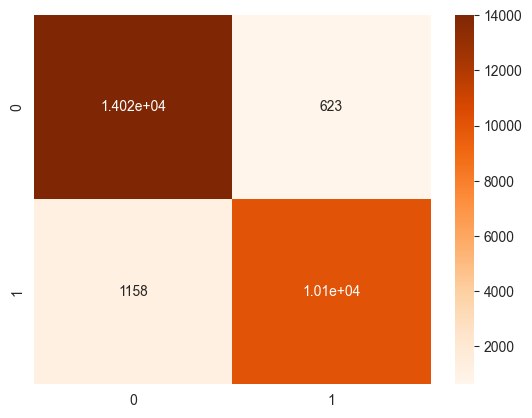

In [33]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction)), annot=True, cmap='Oranges', fmt='.4g');

In [34]:
# use the code below to identify your TP, TN, FP, FN
#tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
#print("True positives: "+ str(tp))
#print("True negatives: "+ str(tn))
#print("False positives: "+ str(fp))
#print("False negatives: "+ str(fn))


### 7.5. Calculate the precision and recall on the test set.




In [35]:
precision_knn = precision_score(y_test, prediction)

In [36]:
recall_knn = recall_score(y_test, prediction)
recall_knn


0.8971032521770037

### 7.6. Use the K-Nearest Neighbours algorithm with standardisation to predict whether a customer with the following characteristics is satisfied or not:
The new customer is the same as before in question 6.9. The values are rewritten here. 

> The customer is a man, a disloyal customer and is aged of 35 years old. His flight is for a business travel, and his company bought him a seat in Eco Plus class. The flight distance is of 2360km, he gave: 
*   3 for the inflight wifi service 
*   4 for the departure arrival time convenience 
*   2 for the ease of online booking
*   2 for the gate location 
*   5 for the food and drink
*   1 for the online boarding 
*   4 for the seat confort 
*   0 for the inflight entertainment
*   4 for the onboard service 
*   3 for the leg room service 
*   4 for the baggage handling 
*   2 for the check-in service 
*   2 for the inflight service 
*   4 for the cleanliness 

> In addition to that, there were a departure delay of 20 minutes and an arrival delay of 10 minutes.

In [37]:
vals = [[35, 2360, 3,4,2,2,5,1,4,0,4,3,4,2,2,4,20,10,0, 1, 1, 0, 1]]
tmp = pd.DataFrame(vals, columns = df_encoded_x_train.columns)
encoded_vals = pp.transform(tmp)

pred_y = knn_model.predict(encoded_vals)
print(pred_y, 'not sat')

[0] not sat


## 8. Decision Tree Classifier with Standardisation
In this part, build a Decision Tree Classifier with the use of the same standardized values you have previously done in question 6 and 7.

You will not need to do the Train/Test splitting again. Use the previously standardized values from question 6.3.  

In [38]:
# import some additional packages 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

### 8.1. Using the below functions `run_
_validation_on_trees` and `plot_cross_validation_on_trees`, compute and determine the optimal parameter for the maximal depth of the Decision Tree Classifier.



*   `run_cross_validation_on_trees` is a function that allows to compute several Decision Tree Classification and their metrics (scores mean, scores standard deviation and accuracy scores) 
*   `plot_cross_validation_on_trees` is a function that plots the accuracies against the number of maximal depth. 

> *   Define a tree depth range from 1 to 25 for the `run_cross_validation_on_trees` function. 
> *   You should perform these functions on the standardized features of the dataset named `data` done on point 5.5. 

In [39]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [40]:
run_cross_validation_on_trees(df_encoded_x_train, y_train, np.arange(1,26))

(array([0.78671136, 0.85984443, 0.8838231 , 0.88811881, 0.90385362,
        0.91898989, 0.93040003, 0.9353811 , 0.94199358, 0.94505366,
        0.94723531, 0.94942661, 0.95158891, 0.95099041, 0.95155997,
        0.95084564, 0.95048848, 0.94958107, 0.94824892, 0.94814273,
        0.9473029 , 0.94710018, 0.94653064, 0.94621207, 0.94633756]),
 array([0.00136956, 0.0030278 , 0.00234967, 0.00279258, 0.00189346,
        0.00113951, 0.00222566, 0.00165359, 0.00159336, 0.00096815,
        0.00073311, 0.0016719 , 0.00189542, 0.00222497, 0.0024413 ,
        0.00167113, 0.00189288, 0.00203684, 0.00200336, 0.00209364,
        0.00220004, 0.00204899, 0.00170093, 0.00202841, 0.00224584]),
 array([0.78671133, 0.85984439, 0.88382308, 0.88813808, 0.90415283,
        0.91901884, 0.93079581, 0.93761101, 0.9445324 , 0.94985134,
        0.95596185, 0.95978454, 0.96433122, 0.96828906, 0.9725558 ,
        0.97625299, 0.9799888 , 0.98361843, 0.98664955, 0.9888891 ,
        0.99079079, 0.99292416, 0.9943625 , 

### 8.2. Use the same dataset `data` as before and the standardised features as in question 6 and 7 to train your model of customers' satisfaction. 


Use `DecisionTreeClassifier()` with the following parameters for your decision tree: 

*   A maximum depth of 10
*   A random state set to 50





In [41]:
tree = DecisionTreeClassifier(max_depth=10, random_state=50)
tree.fit(encoded_x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=50)

### 8.3. Accuracy: What is the test accuracy? What is the train accuracy?

In [42]:
prediction = tree.predict(encoded_x_test)
accuracy_test_tree = accuracy_score(y_test, prediction)
accuracy_test_tree

0.9482199397636883

In [43]:
prediction2 = tree.predict(encoded_x_train)
accuracy_train_tree = accuracy_score(y_train, prediction2)
accuracy_train_tree

0.9498513398718048

### 8.4. Calculate the precision and recall on the test set.




In [44]:
precision_tree = precision_score(y_test, prediction)

In [45]:
recall_tree = recall_score(y_test, prediction)

### 8.5. Plot the confusion matrix for the test data. Based on the outcome, determine how many observations are False Negative and how many are False Positive.

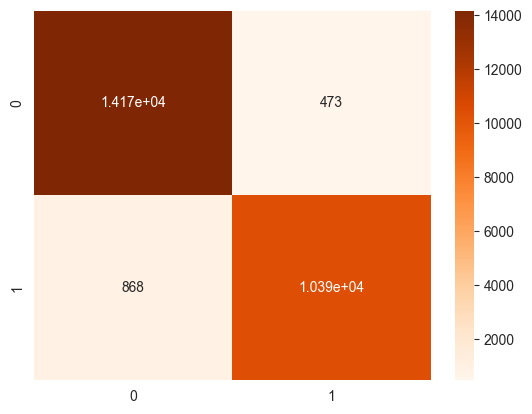

In [46]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction)), annot=True, cmap='Oranges', fmt='.4g');

In [47]:
# use the code below to identify your TP, TN, FP, FN
#tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
#print("True positives: "+ str(tp))
#print("True negatives: "+ str(tn))
#print("False positives: "+ str(fp))
#print("False negatives: "+ str(fn))

### 8.6. Use the Decision Tree Classifier with standardisation to predict whether a customer with the following characteristics is satisfied or not:
The new customer is the same as before in question 6.9. and 7.6. The values are rewritten here. 

> The customer is a man, a disloyal customer and is aged of 35 years old. His flight is for a business travel, and his company bought him a seat in Eco Plus class. The flight distance is of 2360km, he gave: 
*   3 for the inflight wifi service 
*   4 for the departure arrival time convenience 
*   2 for the ease of online booking
*   2 for the gate location 
*   5 for the food and drink
*   1 for the online boarding 
*   4 for the seat confort 
*   0 for the inflight entertainment
*   4 for the onboard service 
*   3 for the leg room service 
*   4 for the baggage handling 
*   2 for the check-in service 
*   2 for the inflight service 
*   4 for the cleanliness 

> In addition to that, there were a departure delay of 20 minutes and an arrival delay of 10 minutes.

In [48]:
vals = [[35, 2360, 3,4,2,2,5,1,4,0,4,3,4,2,2,4,20,10,0, 1, 1, 0, 1]]
tmp = pd.DataFrame(vals, columns = df_encoded_x_train.columns)
encoded_vals = pp.transform(tmp)

pred_y = tree.predict(encoded_vals)
print(pred_y, 'not sat')

[0] not sat


## 9. Models comparison.
In this part we will recall the metrics computed above to determine which models seems to be the best. 

### 9.1. Build a table with the base rate, all the accuracies (train and test), precisions and recall computed above. 
3 models has been performed above:  

1.   *logistic regression*
2.   *K-Nearest Neighbour* 
3.   *Decision Tree classifier*


In [49]:
base_rate = y_train.value_counts(normalize=True)
data = {'Accuracy_test' : [accuracy_test_logistic_regression, accuracy_test_knn, accuracy_test_tree], 'Accuracy_train' : [accuracy_test_logistic_regression, accuracy_train_knn, accuracy_train_tree], 'precision' : [precision_logistic_regression, precision_knn, precision_tree], 'recall' : [recall_logistic_regression, recall_knn, recall_tree], 'base_rate class 0' : [base_rate[0], base_rate[0], base_rate[0]], 'base_rate class 1' : [base_rate[1], base_rate[1], base_rate[1]]}

table = pd.DataFrame(data, index=['logistic regression', 'K-Nearest Neighbour', 'Decision Tree classifier'])

table

,Accuracy_test,Accuracy_train,precision,recall,base_rate class 0,base_rate class 1
logistic regression,0.872384,0.872384,0.869618,0.830905,0.565507,0.434493
K-Nearest Neighbour,0.931230,0.951444,0.941879,0.897103,0.565507,0.434493
Decision Tree classifier,0.948220,0.949851,0.956442,0.922872,0.565507,0.434493


### 9.2. Plot the ROC curve of these models.


In [51]:
# import some additional packages
from sklearn.metrics import roc_curve, roc_auc_score

c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


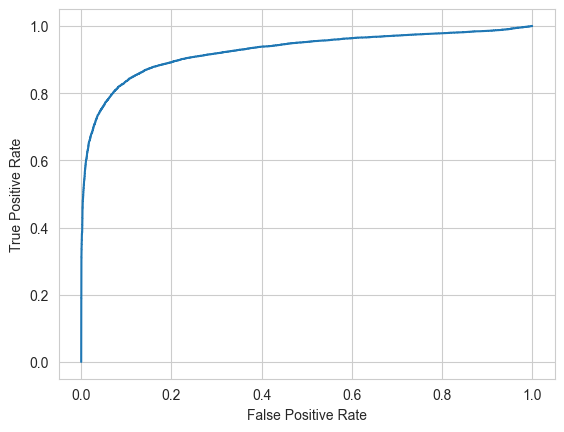

0.9254175285613949


In [68]:
y_pred = lr.predict_proba(encoded_x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc = roc_auc_score(y_test, y_pred)

#plt.plot(roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.show()
print(roc)

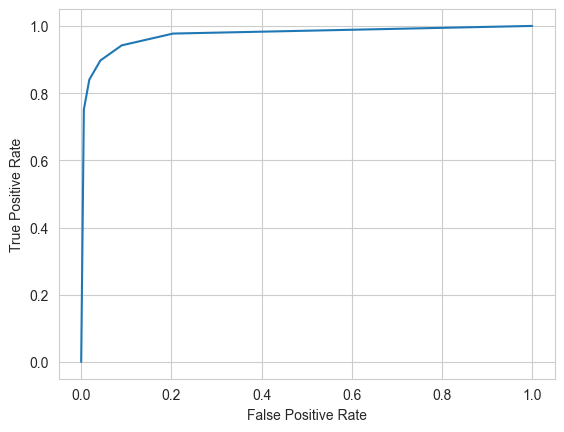

0.9731785037237299


In [69]:
y_pred = knn_model.predict_proba(encoded_x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

#plt.plot(roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.show()
print(roc)

0.9870434850272909


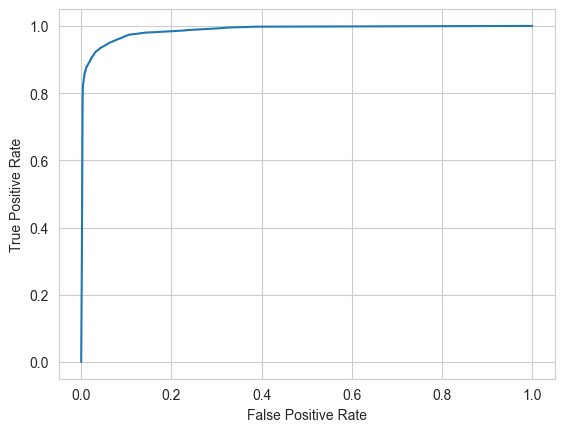

In [70]:
y_pred = tree.predict_proba(encoded_x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc = roc_auc_score(y_test, y_pred)

#plt.plot(roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
print(roc)

c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
c:\users\moham\switchdrive\dmml\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg

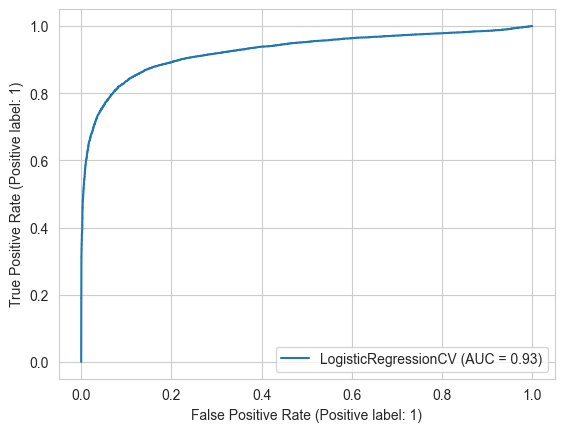

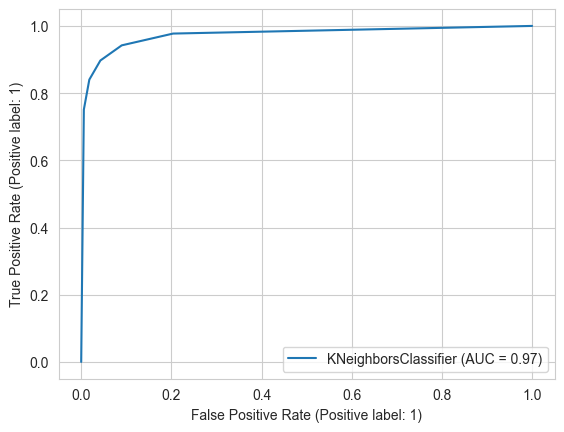

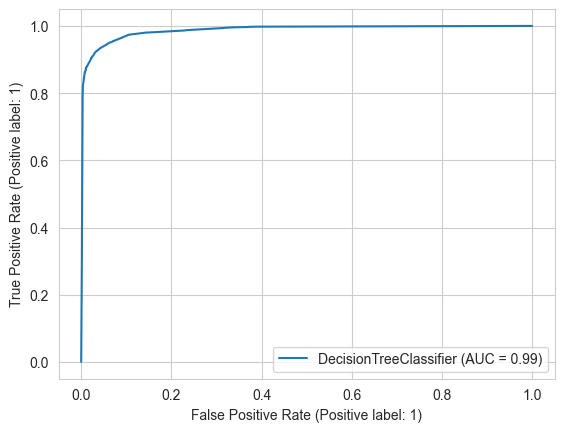

In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, encoded_x_test, y_test)
plot_roc_curve(knn_model, encoded_x_test, y_test)
plot_roc_curve(tree, encoded_x_test, y_test)

## 10. Understanding of Confusion Matrix 
A soft drink company wants to change one ingredient in its product.

*   The price of a bottle is : 10 CHF 
*   The production cost per bottle is : 5 CHF 
*   The cost per bottle incurred by the company in order to modify the ingredient is : 1 CHF  

This modification of the ingredients formula can result in a success or a non-success (failure). 

### 10.1. What should be the minimal estimated probability of success so that the company makes profit ? 

> Hint: Use the expected value formula. 
> $Ps(x)*Vs + (1 - Ps(x))*Vns$

with 
*   $Ps(x)$ the estimated probability of success 
*   $Vs$ the value of a success
*   $Vns$ the value of a non-success (failure) 









In [75]:
# YOUR CODE HERE 
## Not real coding is required, but rather some algebra computation.

ps = 0.6000001
vs = 4
vns = -6

ps*vs+(1-ps)*vns > 0


True

### 10.2. Compute the expected profit based on this confusion matrix and this cost/benefit information.


> Hint: 
> *   you might need to compute the expected rates (matrix of probabilities) 
> *   use the expected profit formula




The manager asks the analyst to produce a model that would predict 
either or not this ingredient change is going to be a success or a non-success (failure).  

Based on a sample of 100 persons, the analyst came up with a model and presents you this confusion matrix. 
We know that:
*   There are 64 success cases in the sample. 
*   There are 36 non-success (failure) cases in the sample. 

> In the Cost/Benefit Information : B(..) is the benefit and c(..) is the cost. 

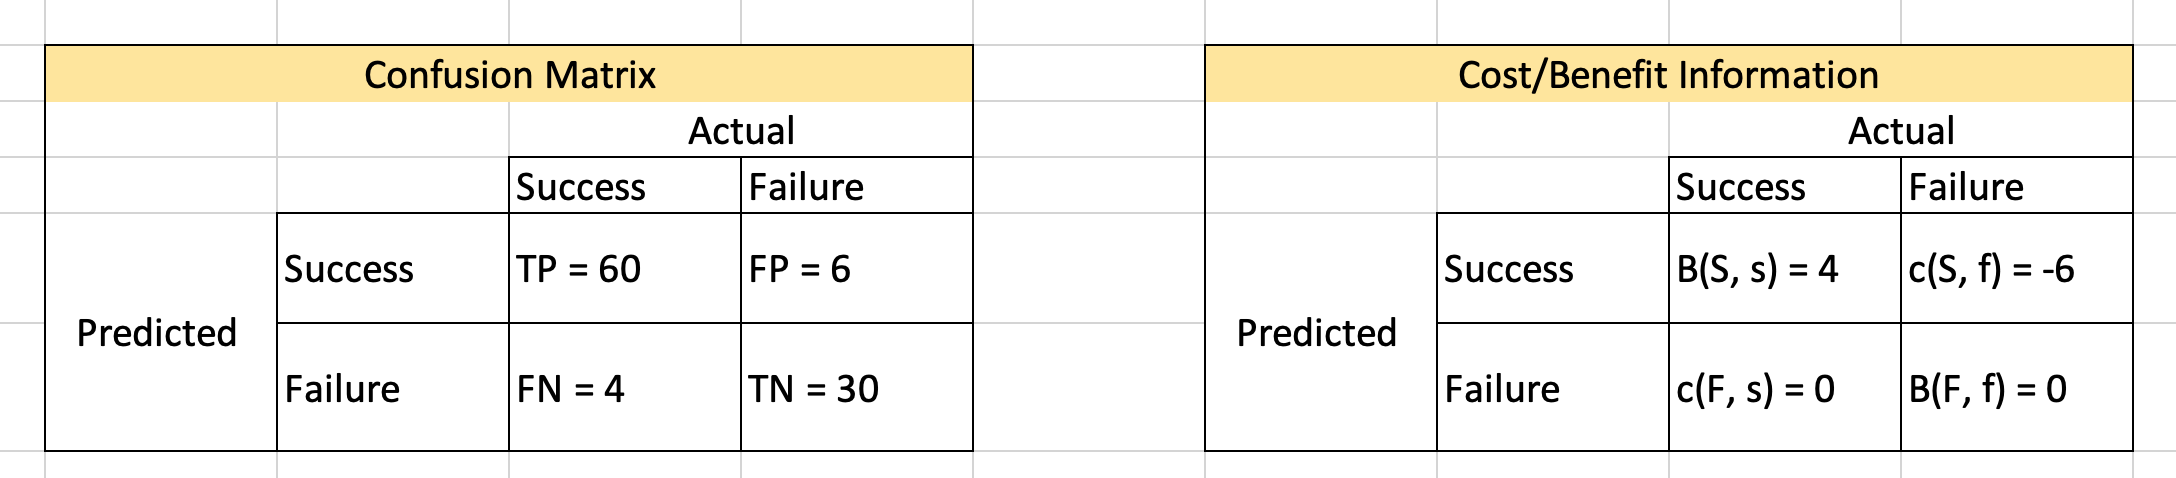

In [76]:
# YOUR CODE HERE 
## Not real coding is required, but rather some algebra computation. 

x = 60*4+6*-6+4*0+30*0

x

204